A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

#Importing Libraries


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Matrics from sklearn is  used for eveluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

 #To supress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
#Read train data
train_test = pd.read_csv("/content/train.csv")

# Read validate data
data_validate = pd.read_csv("/content/test.csv")

train_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
data_validate.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Working on training and testing dataset

In [13]:
data =train_test.copy()
data.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [14]:
data.shape

(550068, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [16]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#Exploratory Data Analysis

In [17]:
data['User_ID'].nunique()
#there are 5891 unique values

5891

In [18]:
data['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

Text(0, 0.5, 'counts')

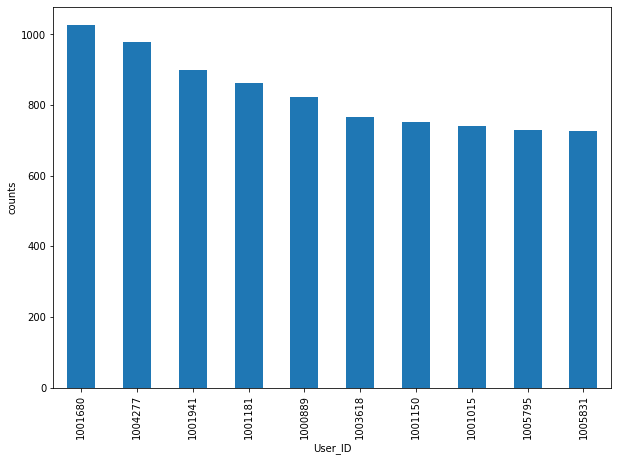

In [19]:
plt.figure(figsize=(10,7))
data['User_ID'].value_counts().head(10).plot(kind='bar')
plt.xlabel('User_ID')
plt.ylabel('counts')


In [20]:
data.groupby(by = 'User_ID')['Purchase'].sum().nlargest(5)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
Name: Purchase, dtype: int64

In [21]:
data['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [22]:
data['Product_ID'].nunique()

3631

In [23]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [24]:
pd.pivot_table(data, values='Purchase', index='Gender', aggfunc=np.sum)

#Male customers have purchased 3times more than femal

,Purchase
Gender,
F,1186232642
M,3909580100


In [25]:
pd.pivot_table(data, values='Purchase', index='Gender', aggfunc=np.mean)
#On average male customer prchase more

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [26]:
data['Age'].nunique()

7

In [27]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [28]:
pd.pivot_table(data, values='Purchase', index='Age', aggfunc=np.mean)

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [29]:
pd.pivot_table(data, values='Purchase', index='Age', aggfunc=np.sum)

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


In [30]:
data['Occupation'].nunique()

21

In [31]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [32]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [33]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

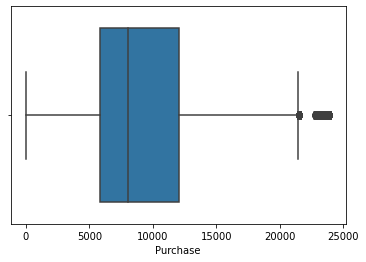

In [34]:
sns.boxplot(data['Purchase'])
#there are outliers

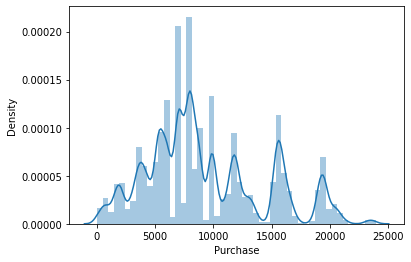

In [35]:
sns.distplot(data['Purchase'])

Data Pre-processing

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Duplicate records

In [37]:
data.duplicated().value_counts()

#There are no duplicate values

False    550068
dtype: int64

Outleir analysis

In [38]:
q1 = data['Purchase'].quantile(0.25)

q3 = data['Purchase'].quantile(0.75)

iqr = q3 - q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [39]:
data[(data['Purchase']<ll) | (data['Purchase']>ul)].shape

(2677, 12)

In [40]:
2677/550068 * 100
#There are 0.48% of outliers in overall data

0.4866671029763593

In [41]:
data = data[~((data['Purchase']<ll) | (data['Purchase']>ul))]

In [42]:
data.shape

(547391, 12)

Null value

In [43]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173226
Product_Category_3            381211
Purchase                           0
dtype: int64

In [44]:
# there are null values in Product_Category_2 & Product_Category_3

In [45]:
data['Product_Category_2'].unique()
#Product may belongs to other category also

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [46]:
#we impute the null values to Product_Category_2 & Product_Category_3 with 0, becuase they dont belong to any category

In [47]:
data = data.fillna(0)

In [48]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Split the data

In [49]:
y = data['Purchase']

X = data.drop('Purchase', axis=1)

Label encoding

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     547391 non-null  int64  
 1   Product_ID                  547391 non-null  object 
 2   Gender                      547391 non-null  object 
 3   Age                         547391 non-null  object 
 4   Occupation                  547391 non-null  int64  
 5   City_Category               547391 non-null  object 
 6   Stay_In_Current_City_Years  547391 non-null  object 
 7   Marital_Status              547391 non-null  int64  
 8   Product_Category_1          547391 non-null  int64  
 9   Product_Category_2          547391 non-null  float64
 10  Product_Category_3          547391 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 50.1+ MB


In [51]:
#Product_ID is insignificant, so we remove that variable

X.drop('Product_ID', axis=1, inplace=True)

In [52]:
X.drop('User_ID', axis=1, inplace=True)

In [53]:
#changing datatype of Product_Category_2 & Product_Category_3 to int

X[['Product_Category_2', 'Product_Category_3']] = X[['Product_Category_2', 'Product_Category_3']].astype('int')

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      547391 non-null  object
 1   Age                         547391 non-null  object
 2   Occupation                  547391 non-null  int64 
 3   City_Category               547391 non-null  object
 4   Stay_In_Current_City_Years  547391 non-null  object
 5   Marital_Status              547391 non-null  int64 
 6   Product_Category_1          547391 non-null  int64 
 7   Product_Category_2          547391 non-null  int64 
 8   Product_Category_3          547391 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 41.8+ MB


In [55]:
cat_cols = list(X.select_dtypes(exclude='number').columns)
cat_cols

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [56]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [57]:
X.shape

(547391, 18)

train test split with 30% of test data

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)

In [60]:
X_train.shape, X_test.shape

((383173, 18), (164218, 18))

#Model building

1. Linear regression

In [61]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error

In [62]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [63]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2885


# 1.1 Removing user_id columns

In [64]:
X_train.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [65]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [66]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2885


# 1.2Binning user_id columns

In [67]:
def user_bin(x):
    if x < 1001000:
        return 1
    elif x < 1002000:
        return 2
    elif x < 1003000:
        return 3
    elif x < 1004000:
        return 4
    elif x < 1005000:
        return 5
    else:
        return 6

In [68]:
#X_train['User_ID'] = X_train['User_ID'].apply(lambda x : user_bin(x))

#X_test['User_ID'] = X_test['User_ID'].apply(lambda x : user_bin(x))

In [69]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [70]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2885


4511.2325
There is no effect with user_id column, so remove that

 # 1.3Label encode ==> occupation, product category

In [71]:
#X.drop('User_ID', axis=1, inplace=True)

In [72]:
X.shape

(547391, 18)

In [73]:
X.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [74]:
X1 = pd.get_dummies(X, columns=['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [75]:
X1.shape

(547391, 85)

In [76]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size=0.3, random_state=4)

In [77]:
lir = LinearRegression()
lir.fit(X_train1, y_train1)

LinearRegression()

In [78]:
y_test_pred = lir.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2950.96


2982.96, this method worked abit

# 1.4 Adding new column, total_amount

In [79]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [80]:
X['User_ID'] = data['User_ID']

In [81]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [82]:
user_sum = pd.pivot_table(data,  values='Purchase', index='User_ID',  aggfunc=np.sum)
user_sum.head(5)

,Purchase
User_ID,
1000001,334093
1000002,810472
1000003,341635
1000004,206468
1000005,821001


In [83]:
user_sum.columns = ['Total_purchase']

In [84]:
user_sum['User_ID'] = user_sum.index

user_sum.reset_index(drop=True, inplace=True)

In [85]:
user_sum.head(5)

,Total_purchase,User_ID
0,334093,1000001
1,810472,1000002
2,341635,1000003
3,206468,1000004
4,821001,1000005


In [86]:
#join this to main dataframe

X_new = pd.merge(X, user_sum, on='User_ID')

In [87]:
X_new['Total_purchase'].nunique()

5878

In [88]:
X_new['User_ID'].nunique()

5891

In [89]:
X_new.drop('User_ID', axis=1, inplace=True)

In [90]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y, test_size=0.3, random_state=4)

In [91]:
lir = LinearRegression()
lir.fit(X_train1, y_train1)

LinearRegression()

In [92]:
y_test_pred = lir.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4933.8948


4894.8718, not at all usefull

# 1.5 Recursive feature elimination (RFE)

In [93]:
from sklearn.feature_selection import RFE, RFECV

In [94]:
X.drop('User_ID', axis=1, inplace=True)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)

In [96]:
lir = LinearRegression()

#RUN RFECV to find out the best number of features to be selected
rfe_n = RFECV(estimator=lir, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
rfe_n.fit(X, y)

Fitting estimator with 18 features.


RFECV(cv=3, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_root_mean_squared_error', verbose=2)

In [97]:
#Number
print('Number of features selected :', rfe_n.n_features_)

Number of features selected : 17


In [98]:
#Selected features
selected = list(X.columns[rfe_n.support_])
print('\nSelected features :',selected)


Selected features : ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_3', 'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']


In [99]:
#selecting only features from RFE in both train & test dataset

X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

In [100]:
X.shape

(547391, 18)

In [101]:
lir = LinearRegression()
lir.fit(X_train_sel, y_train)

LinearRegression()

In [102]:
y_test_pred = lir.predict(X_test_sel)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2841


4495.2841, we can try RFE on 1.3

In [103]:
X1 = pd.get_dummies(X, columns=['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [104]:
X1.shape

(547391, 85)

In [105]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size=0.3, random_state=4)

In [106]:
lir = LinearRegression()

#RUN RFECV to find out the best number of features to be selected
rfe_n = RFECV(estimator=lir, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
rfe_n.fit(X1 , y)

Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.


RFECV(cv=3, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_root_mean_squared_error', verbose=2)

In [107]:
#Number
print('Number of features selected :', rfe_n.n_features_)

Number of features selected : 62


In [108]:
#Selected features
selected = list(X1.columns[rfe_n.support_])
print('\nSelected features :',selected)


Selected features : ['Age_18-25', 'Age_26-35', 'Age_51-55', 'City_Category_B', 'City_Category_C', 'Occupation_3', 'Occupation_4', 'Occupation_6', 'Occupation_8', 'Occupation_12', 'Occupation_14', 'Occupation_15', 'Occupation_17', 'Occupation_19', 'Occupation_20', 'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10', 'Product_Category_1_11', 'Product_Category_1_12', 'Product_Category_1_13', 'Product_Category_1_14', 'Product_Category_1_15', 'Product_Category_1_16', 'Product_Category_1_17', 'Product_Category_1_18', 'Product_Category_1_19', 'Product_Category_1_20', 'Product_Category_2_3', 'Product_Category_2_4', 'Product_Category_2_5', 'Product_Category_2_7', 'Product_Category_2_8', 'Product_Category_2_9', 'Product_Category_2_10', 'Product_Category_2_11', 'Product_Category_2_12', 'Product_Category_2_13', 'Product_Category_2_14',

In [109]:
#selecting only features from RFE in both train & test dataset

X_train_sel = X_train1[selected]
X_test_sel = X_test1[selected]

In [110]:
lir = LinearRegression()
lir.fit(X_train_sel, y_train1)

LinearRegression()

In [111]:
y_test_pred = lir.predict(X_test_sel)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2951.5624


2981.9553, this is not effective. We will consider 1.3 as final linear regression

Final Linear Regression

In [112]:
X.shape

(547391, 18)

In [113]:
X1 = pd.get_dummies(X, columns=['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [114]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size=0.3, random_state=4)

In [115]:
lir = LinearRegression()
lir.fit(X_train1, y_train1)

LinearRegression()

In [116]:
y_test_pred = lir.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2950.96


In [117]:
#remove product and user id, null imputation, label encode
X1.shape

(547391, 85)

In [118]:
#read validate data
data_validate = pd.read_csv('/content/test.csv')

data_validate.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [119]:
data_validate_copy = pd.read_csv('/content/test.csv')

In [120]:
data_validate.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [121]:
data_validate = data_validate.fillna(0)

In [122]:
data_validate[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = data_validate[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype('int')

In [123]:
data_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      233599 non-null  object
 1   Age                         233599 non-null  object
 2   Occupation                  233599 non-null  int64 
 3   City_Category               233599 non-null  object
 4   Stay_In_Current_City_Years  233599 non-null  object
 5   Marital_Status              233599 non-null  int64 
 6   Product_Category_1          233599 non-null  int64 
 7   Product_Category_2          233599 non-null  int64 
 8   Product_Category_3          233599 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 16.0+ MB


In [124]:
data_validate = pd.get_dummies(data_validate, columns=data_validate.columns, drop_first=True)

In [125]:
X1_cols = list(X1.columns)
val_cols = list(data_validate.columns)
for i in X1_cols:
    if i not in val_cols:
        print(i)

Marital_Status
Product_Category_1_19
Product_Category_1_20


In [126]:
data_validate[['Product_Category_1_19', 'Product_Category_1_20' ]] = 0

In [127]:
data_validate.shape

(233599, 85)

In [128]:
val_pred = lir.predict(data_validate)

In [129]:
type(val_pred)

numpy.ndarray

In [130]:
submission_1 = pd.DataFrame(val_pred, columns=['Purchase'])

In [131]:
submission_1['User_ID'] = data_validate_copy['User_ID']

In [132]:
submission_1['Product_ID'] = data_validate_copy['Product_ID']

In [133]:
submission_1.to_csv('submission_1.csv')

In [134]:
submission_1.head()

,Purchase,User_ID,Product_ID
0,13358.025196,1000004,P00128942
1,12706.615610,1000009,P00113442
2,5444.828347,1000010,P00288442
3,2840.379771,1000010,P00145342
4,3486.657207,1000011,P00053842


In [135]:
#Without those label encoding

In [136]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [137]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2885


In [138]:
X_train.shape

(383173, 18)

In [139]:
data_validate = pd.get_dummies(data_validate, columns=data_validate.select_dtypes(exclude='number').columns, drop_first=True)

In [140]:
#val_pred = lir.predict(data_validate)

In [141]:
#submission_1_1 = pd.DataFrame(val_pred, columns=['Purchase'] )

#submission_1_1['User_ID'] = df_validate_copy['User_ID']

#submission_1_1['Product_ID'] = df_validate_copy['Product_ID']

#submission_1_1.to_csv('submission_1_1.csv')

# Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)

DecisionTreeRegressor()

In [144]:
y_test_pred = dtc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3320.1778


In [145]:
#val_pred = dtc.predict(data_validate)

#submission_dtc = pd.DataFrame(val_pred, columns=['Purchase'] )

#submission_dtc['User_ID'] = data_validate_copy['User_ID']

#submission_dtc['Product_ID'] = data_validate_copy['Product_ID']

#submission_dtc.to_csv('submission_dtc.csv')

In [146]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [147]:
# GridSearchCV & RandomizedSearchCV results were almost similar
# We are considering RandomizedSearchCV for Hyper-parameter tuning

dtc = DecisionTreeRegressor(random_state=4)

params = {'max_depth' : sp_randint(2,10),
         'min_samples_leaf' : sp_randint(1,12)}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, n_iter=25, n_jobs=-1, 
                             cv=3, scoring='neg_root_mean_squared_error', random_state=4)

# RandomizedSearchCV on overall transformed datasets
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=4),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164f824150>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164f81d6d0>},
                   random_state=4, scoring='neg_root_mean_squared_error')

In [148]:
#Best parameters
print(rsearch.best_params_)

{'max_depth': 9, 'min_samples_leaf': 10}


In [149]:
dtc = DecisionTreeRegressor(**rsearch.best_params_, random_state=4)
dtc.fit(X_train, y_train)

y_test_pred = dtc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2931.1061


In [150]:
#val_pred = dtc.predict(df_validate)

In [151]:
#submission_dtc_hp = pd.DataFrame(val_pred, columns=['Purchase'] )

#submission_dtc_hp['User_ID'] = df_validate_copy['User_ID']

#submission_dtc_hp['Product_ID'] = df_validate_copy['Product_ID']

#submission_dtc_hp.to_csv('submission_dtc_hp.csv')

#RandomForest

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
rfr = RandomForestRegressor(random_state=4)
rfr.fit(X_train, y_train)

y_test_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3015.7125


In [154]:
X

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6,14,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10,0,12,14,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,16,0,8,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
550064,1,0,20,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
550065,15,1,20,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
550066,1,0,20,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [155]:
#val_pred = rfr.predict(data_validate)

#submission_rfr = pd.DataFrame(val_pred, columns=['Purchase'] )

#submission_rfr['User_ID'] = data_validate_copy['User_ID']

#submission_rfr['Product_ID'] = data_validate_copy['Product_ID']

#submission_rfr.to_csv('submission_rfr.csv')

In [156]:
rfr = RandomForestRegressor(random_state=4)
rfr.fit(X_train1, y_train1)

y_test_pred = rfr.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3011.6509


#RandomForest Hyperparameter tuning

In [157]:
rfr = RandomForestRegressor(random_state=4)


params = {'n_estimators': sp_randint(50,200),
         'max_features': sp_randint(1,15),
         'min_samples_leaf' : sp_randint(1,25),
          'max_depth' : sp_randint(1,10)}

rsearch = RandomizedSearchCV(rfr, param_distributions=params, cv=3, n_iter=30, verbose=2, 
                             scoring='neg_root_mean_squared_error', random_state=4, n_jobs=-1)
rsearch.fit(X, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=4),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164f97dad0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164f82e4d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164f82e5d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1659eb03d0>},
                   random_state=4, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [158]:
#Best parameters
print(rsearch.best_params_)

{'max_depth': 9, 'max_features': 12, 'min_samples_leaf': 21, 'n_estimators': 102}


In [159]:
rfr = RandomForestRegressor(**rsearch.best_params_, random_state=4)
rfr.fit(X_train, y_train)
y_test_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = round(np.sqrt(mse), 4)
print(rmse)

2927.5216


In [160]:
pd.DataFrame(rsearch.cv_results_).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,46.885121,0.313399,2.55041,0.053155,8,6,2,154,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",-3430.274401,-3461.110604,-3455.124093,-3448.836366,13.350892,10


In [161]:
#val_pred = rfr.predict(data_validate)

#submission_rfr = pd.DataFrame(val_pred, columns=['Purchase'] )

#submission_rfr['User_ID'] = data_validate_copy['User_ID']

#submission_rfr['Product_ID'] = data_validate_copy['Product_ID']

#submission_rfr.to_csv('submission_rfr_hp_old.csv')

#LGBMClassifier

In [162]:
import lightgbm as lgb

In [163]:
lgbc = lgb.LGBMRegressor()
lgbc.fit(X_train, y_train)

LGBMRegressor()

In [164]:
y_test_pred = lgbc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2879.1683


#LGBMClassifier with Hyper-parameter tuning

In [165]:
from scipy.stats import uniform as sp_uniform

In [166]:
lgbc = lgb.LGBMRegressor() 

params = {'n_estimators':sp_randint(50,250),
         'max_depth' : sp_randint(1,50),
         'learning_rate' : sp_uniform(0,0.5)}

rsearch = RandomizedSearchCV(lgbc, param_distributions = params, scoring = 'neg_root_mean_squared_error', cv = 3, n_iter = 50,
                             n_jobs = -1, random_state = 4)
rsearch.fit(X, y) 

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164f81d450>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164fae6090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f164fabf0d0>},
                   random_state=4, scoring='neg_root_mean_squared_error')

In [167]:
#Best parameters
print(rsearch.best_params_)

{'learning_rate': 0.3797647645816657, 'max_depth': 17, 'n_estimators': 229}


In [168]:
lgbc = lgb.LGBMRegressor(**rsearch.best_params_, random_state=4)
lgbc.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.3797647645816657, max_depth=17, n_estimators=229,
              random_state=4)

In [169]:
y_test_pred = lgbc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2823.4381


In [170]:
#val_pred = lgbc.predict(df_validate)

#submission = pd.DataFrame(val_pred, columns=['Purchase'] )
#
#submission['User_ID'] = df_validate_copy['User_ID']

#submission['Product_ID'] = df_validate_copy['Product_ID']

#submission.to_csv('submission_lgbm_hp_old.csv')

In [171]:
#df_validate = pd.get_dummies(df_validate, columns=['Gender','Age', 'City_Category', 'Stay_In_Current_City_Years' ], drop_first=True)

#KNeighborsRegressor

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3210.0239


#Gradient Boosting

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

In [181]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_test_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = round(np.sqrt(mse), 4)

print(rmse)

2954.4465


In [182]:
%%time

#val_pred = gbr.predict(df_validate)

#submission = pd.DataFrame(val_pred, columns=['Purchase'] )

#submission['User_ID'] = df_validate_copy['User_ID']

#submission['Product_ID'] = df_validate_copy['Product_ID']

#submission.to_csv('submission_gbr.csv')

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs


In [184]:
## XY full

gbr = GradientBoostingRegressor()
gbr.fit(X, y)

y_test_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = round(np.sqrt(mse), 4)

print(rmse)

2952.8658
